### Import our libraries

In [5]:
import numpy as np
import pandas as pd
import os,sys,glob,math,pickle
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd
np.set_printoptions(threshold=sys.maxsize)
from scipy.optimize import curve_fit
import math
import seaborn as sns
from scipy.stats import kde
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime

### Specify files and parameters

In [16]:
i = 10
print(i%3)

1


In [6]:
# file name 

file = "test.xyz"

fileok=os.path.isfile(file)
print(fileok)

True


In [19]:
lines = [] 
with open(file,"r") as f:
    for i, line in enumerate(f):
        if i == 0 :
            natoms = int(line)
            print("number of atoms identified to be ", natoms )
        if i%(natoms+2) != 0 and i%(natoms+2) != 1:
            line = line.split()
            lines.append(line)
        last_line = i +1

nframes  = int(last_line/(natoms+2))

print("number of frames found to be ", nframes)

number of atoms identified to be  2
number of frames found to be  501


In [20]:
lines

[['1', '6.096780', '13.403600', '8.592850'],
 ['1', '6.235190', '14.221400', '9.778560'],
 ['1', '6.091650', '13.399100', '8.593290'],
 ['1', '6.234950', '14.220900', '9.777920'],
 ['1', '6.086700', '13.394200', '8.593520'],
 ['1', '6.234700', '14.220400', '9.777290'],
 ['1', '6.082040', '13.389000', '8.593610'],
 ['1', '6.234370', '14.220200', '9.776670'],
 ['1', '6.077770', '13.383500', '8.593580'],
 ['1', '6.233900', '14.220100', '9.776080'],
 ['1', '6.073980', '13.377800', '8.593510'],
 ['1', '6.233240', '14.220100', '9.775520'],
 ['1', '6.070750', '13.371800', '8.593440'],
 ['1', '6.232350', '14.220200', '9.775000'],
 ['1', '6.068160', '13.365600', '8.593410'],
 ['1', '6.231210', '14.220400', '9.774520'],
 ['1', '6.066240', '13.359300', '8.593480'],
 ['1', '6.229830', '14.220700', '9.774100'],
 ['1', '6.065020', '13.352900', '8.593690'],
 ['1', '6.228230', '14.221100', '9.773740'],
 ['1', '6.064530', '13.346500', '8.594060'],
 ['1', '6.226450', '14.221600', '9.773480'],
 ['1', '6.

In [59]:
lines[::2]

[['1', '6.096780', '13.403600', '8.592850'],
 ['1', '6.091650', '13.399100', '8.593290'],
 ['1', '6.086700', '13.394200', '8.593520'],
 ['1', '6.082040', '13.389000', '8.593610'],
 ['1', '6.077770', '13.383500', '8.593580'],
 ['1', '6.073980', '13.377800', '8.593510'],
 ['1', '6.070750', '13.371800', '8.593440'],
 ['1', '6.068160', '13.365600', '8.593410'],
 ['1', '6.066240', '13.359300', '8.593480'],
 ['1', '6.065020', '13.352900', '8.593690'],
 ['1', '6.064530', '13.346500', '8.594060'],
 ['1', '6.064730', '13.340100', '8.594610'],
 ['1', '6.065610', '13.333800', '8.595370'],
 ['1', '6.067090', '13.327600', '8.596330'],
 ['1', '6.069120', '13.321600', '8.597500'],
 ['1', '6.071600', '13.315800', '8.598860'],
 ['1', '6.074420', '13.310400', '8.600420'],
 ['1', '6.077490', '13.305300', '8.602150'],
 ['1', '6.080680', '13.300600', '8.604030'],
 ['1', '6.083870', '13.296400', '8.606060'],
 ['1', '6.086960', '13.292800', '8.608210'],
 ['1', '6.089830', '13.289700', '8.610460'],
 ['1', '6.

In [60]:
lines[1::2]

[['1', '6.235190', '14.221400', '9.778560'],
 ['1', '6.234950', '14.220900', '9.777920'],
 ['1', '6.234700', '14.220400', '9.777290'],
 ['1', '6.234370', '14.220200', '9.776670'],
 ['1', '6.233900', '14.220100', '9.776080'],
 ['1', '6.233240', '14.220100', '9.775520'],
 ['1', '6.232350', '14.220200', '9.775000'],
 ['1', '6.231210', '14.220400', '9.774520'],
 ['1', '6.229830', '14.220700', '9.774100'],
 ['1', '6.228230', '14.221100', '9.773740'],
 ['1', '6.226450', '14.221600', '9.773480'],
 ['1', '6.224530', '14.222200', '9.773330'],
 ['1', '6.222540', '14.222800', '9.773300'],
 ['1', '6.220520', '14.223400', '9.773430'],
 ['1', '6.218520', '14.224000', '9.773710'],
 ['1', '6.216580', '14.224700', '9.774170'],
 ['1', '6.214730', '14.225300', '9.774810'],
 ['1', '6.213000', '14.225900', '9.775610'],
 ['1', '6.211370', '14.226400', '9.776580'],
 ['1', '6.209860', '14.226800', '9.777700'],
 ['1', '6.208440', '14.227100', '9.778940'],
 ['1', '6.207090', '14.227200', '9.780280'],
 ['1', '6.

In [ ]:
coords = np.zeros((natoms, 3, nframes))

a = 0
for ix in lines[::2]:
    coords[0,0,a] = float(ix[1])
    coords[0,1,a] = float(ix[2])
    coords[0,2,a] = float(ix[3])
    a =a +1

a = 0
for ix in lines[1::2]:
    coords[1,0,a] = float(ix[1])
    coords[1,1,a] = float(ix[2])
    coords[1,2,a] = float(ix[3])
    a =a +1

### Do the ACF calculation here

In [64]:
acf = [] 

# This is your reference frame 
ix = 0

for iy in range(nframes):
    if iy == 0:
        print("program started: ", datetime.now())
    if iy == nframes-1:
        print("program ends: ", datetime.now())

    if ix != iy: 

        vec_ix = ((coords[0, 0, ix]-coords[1, 0, ix]), (coords[0, 1, ix]-coords[1, 1, ix]), (coords[0, 2, ix]-coords[1, 2, ix]) )
        vec_iy = ((coords[0, 0, iy]-coords[1, 0, iy]), (coords[0, 1, iy]-coords[1, 1, iy]), (coords[0, 2, iy]-coords[1, 2, iy]) )

        det_ix = np.sqrt((vec_ix[0])**2 + (vec_ix[1])**2 + (vec_ix[2])**2 )
        det_iy = np.sqrt((vec_iy[0])**2 + (vec_iy[1])**2 + (vec_iy[2])**2 )

        unit_ix = vec_ix/det_ix
        unit_iy = vec_iy/det_iy

        dot = np.dot(unit_ix,unit_iy)

        acf.append(dot)

program started:  2025-02-20 12:32:16.933038
program ends:  2025-02-20 12:32:16.942374


### For plotting 

In [65]:
def set_fig():     
    
    plt.rc('xtick', labelsize=40) 
    plt.rc('ytick', labelsize=40) 
    plt.rc('axes', labelsize=60) # fontsize of the x and y labels
    
#    ax.xaxis.set_minor_locator(AutoMinorLocator(2))  
#    ax.yaxis.set_minor_locator(AutoMinorLocator(2))

    ax.tick_params(which='major', bottom=True, top=True, left=True, right=True, length=15, width=3, direction="in", pad=20)
    ax.tick_params(which='minor', bottom=True, top=True, left=True, right=True, length=10, width=3, direction="in", pad=20)
    
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(3)

In [66]:
frames=np.arange(0,nframes,1)

frames=(frames*0.55)/1000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


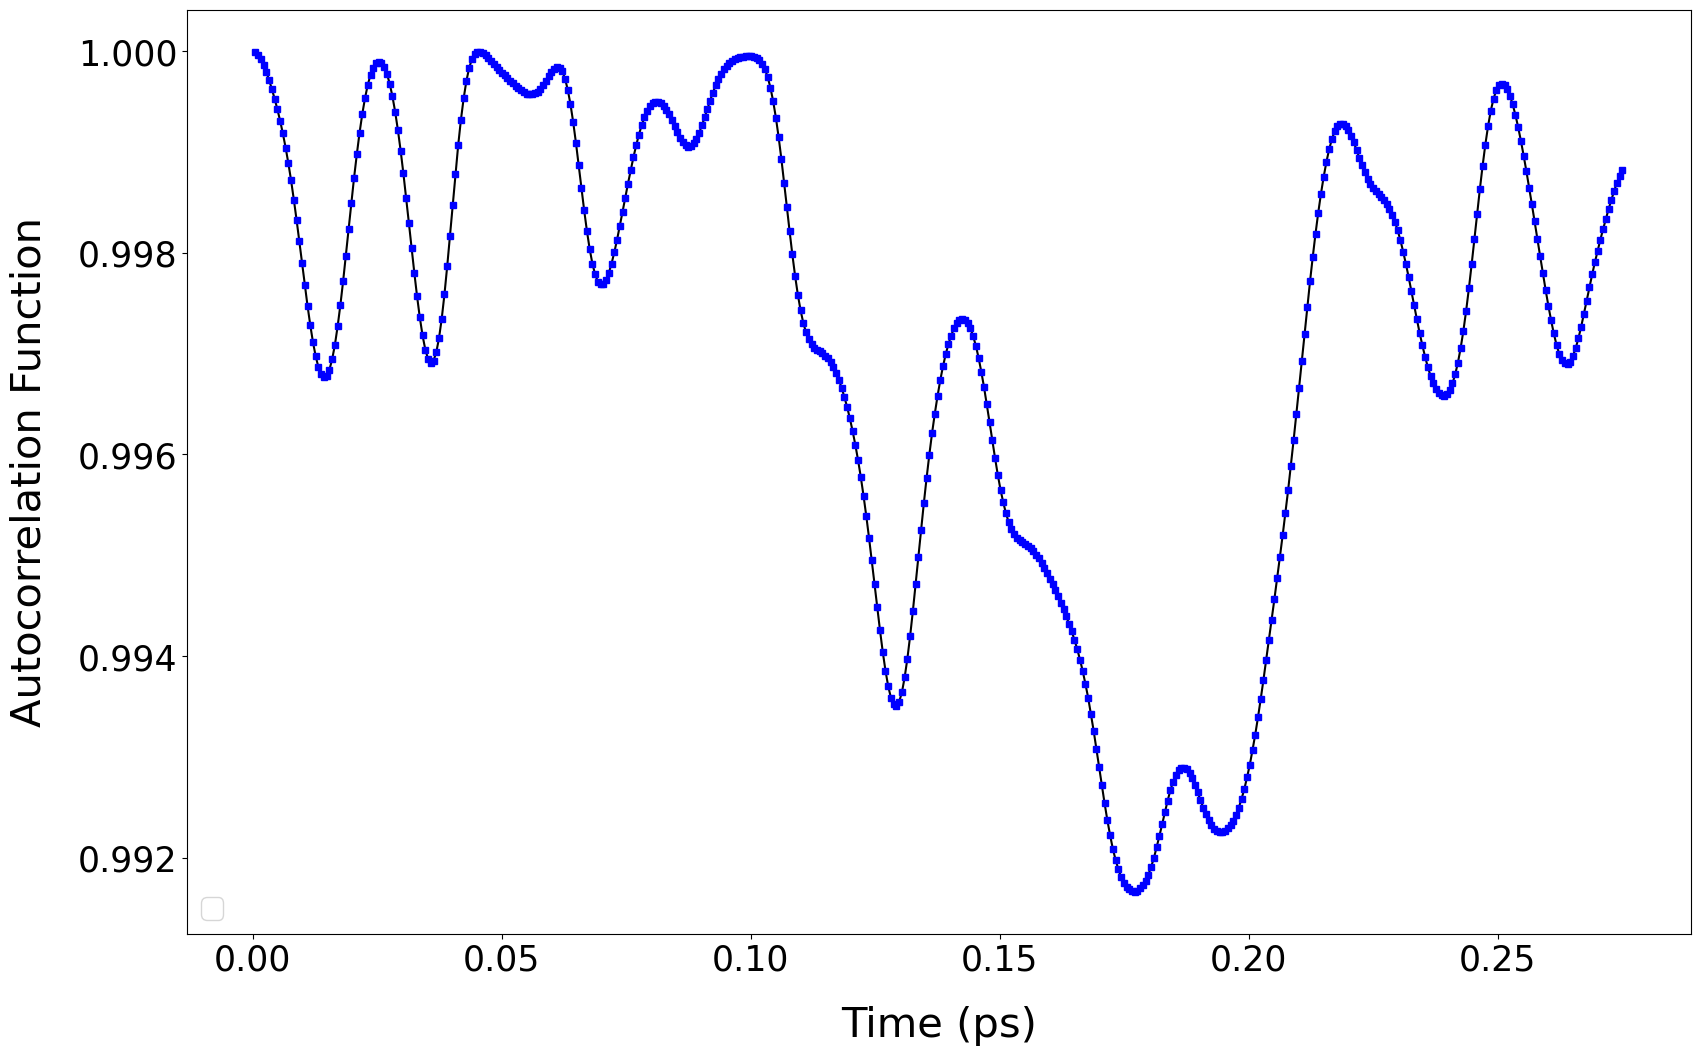

In [68]:
fig, ax = plt.subplots(figsize=(19.4, 12))
plt.xlabel('Time (ps)', labelpad=20, size=30)
plt.ylabel('Autocorrelation Function', labelpad=20,size=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.plot(frames[1:], acf[:], color='black', linewidth=1.5,marker='s', markersize=5, markeredgewidth=1, markeredgecolor='blue', mfc='blue')

# plt.plot(frames, acf[1000,:], label='Ref = frame 1000', color='black', linewidth=1.5,marker='s', markersize=5, markeredgewidth=1, markeredgecolor='blue', mfc='blue')
# plt.plot(frames, acf[:,900], label='Total', color='black', linewidth=1.5,marker='s', markersize=5, markeredgewidth=1, markeredgecolor='green', mfc='crimson')

plt.legend(loc = 'lower left', markerscale = 1, fontsize = 20)
